In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [27]:
def plot_res(config_train, tresh, tresh_folder):

    dataset_name = config_train['dataset_name']
    
    config_test = config_train.copy()
    config_test['mode'] = 'test'
    config_test['step'] = config_test['win_size']
    config_test['test_model'] = f'test_{config_test["ID"]}/space_checkpoint.pth'
    config_test["quantile_treshold"] = tresh


    if not os.path.exists(f'test_{config_test["ID"]}/{tresh_folder}'):
        os.makedirs(f'test_{config_test["ID"]}/{tresh_folder}')

    #Plotting
    test = np.loadtxt(f'test_{config_test["ID"]}/train_energy_test.csv', delimiter=',')
    train = np.loadtxt(f'test_{config_test["ID"]}/train_energy.csv', delimiter=',')

    #HISTOGRAMS
    fig, ax = plt.subplots(2,1,figsize=(10, 6))

    ax[0].hist(test, bins=100)
    ax[0].set_title('Test set')
    ax[0].set_yscale('log')
    ax[1].hist(train, bins=100)
    ax[1].set_title('Train set')
    ax[1].set_yscale('log')

    fig.savefig(f'test_{config_test["ID"]}/{tresh_folder}/histograms.png')

    trh = np.quantile(train, config_test['quantile_treshold'])

    plt.close()

    #tresholded histograms

    fig, ax = plt.subplots()
    print(trh)
    N, bins, patches = ax.hist(test, edgecolor='white', linewidth=1,bins = np.linspace(0,20,50))
    thr_index = np.where(bins>trh)[0][0] + 1
    for i in range(0,thr_index):
        patches[i].set_facecolor('b')
    for i in range(thr_index, len(patches)):    
        patches[i].set_facecolor('r')
    ax.set_title('Test set')
    ax.set_yscale('log')
    ax.axvline(x =10, color='r', linestyle='--')
    # ax.set_xscale('log')
    fig.savefig(f'test_{config_test["ID"]}/{tresh_folder}/histograms_trsh.png')

    plt.show()


    fig, ax = plt.subplots(2,1,figsize=(10, 6))

    ax[0].hist(test[test>trh], bins=100)
    ax[0].set_title('Test set')
    

    ax[1].hist(train[train>trh], bins=100)
    ax[1].set_title('Train set treshold: '+str(trh))

    fig.savefig(f'test_{config_test["ID"]}/{tresh_folder}/histograms_trsh.png')
    plt.close()

    #load dataset
    test_path = os.path.join(config_test['data_path'], dataset_name[0])
    train_path = os.path.join(config_test['data_path'], dataset_name[1])

    test_set=pd.read_csv(test_path)
    train_set=pd.read_csv(train_path)
    test_set.set_index('time', inplace=True)
    train_set.set_index('time', inplace=True)

    comp_set=pd.concat([test_set, train_set])
    comp_set.sort_values(by='time', inplace=True)


    comp_set.index = pd.to_datetime(comp_set.index)

    fig, ax = plt.subplots(len(comp_set.columns)+1,1,figsize=(100, 50))

    points = np.where(train>trh)[0]

    points_test = np.where(test>trh)[0]
    points_test = points_test + len(train)

    for i in range(1, len(comp_set.columns)+1):
        ax[i].plot(range(len(comp_set[comp_set.keys()[i-1]].values)),comp_set[comp_set.keys()[i-1]].values)
        ax[i].set_title(comp_set.keys()[i-1])

    for l in range(0, len(comp_set.columns)+1):

        for x in points:
            ax[l].axvline(x=x, color='r',alpha=0.1)

        for x in points_test:
            ax[l].axvline(x=x, color='g',alpha=0.1)


    ax[0].plot(train)
    ax[0].set_title(f'Model output, {config_test["quantile_treshold"]} treshold, anomalies_found: {len(points)+len(points_test)}')
    ax[0].plot(range(len(train),len(train)+len(test)),test)


    fig.savefig(f'test_{config_test["ID"]}/{tresh_folder}/final_time_series.png')

    plt.close("all")



    fig, ax = plt.subplots(2,1,figsize=(10, 6))

    ax[0].hist(test[test>trh], bins=100)
    ax[0].set_title('Test set')
    

    ax[1].hist(train[train>trh], bins=100)
    ax[1].set_title('Train set treshold: '+str(trh))

    fig.savefig(f'test_{config_test["ID"]}/{tresh_folder}/histograms_trsh.png')
    plt.close()

    #load dataset
    test_path = os.path.join(config_test['data_path'], dataset_name[0])
    train_path = os.path.join(config_test['data_path'], dataset_name[1])

    test_set=pd.read_csv(test_path)
    train_set=pd.read_csv(train_path)
    test_set.set_index('time', inplace=True)
    train_set.set_index('time', inplace=True)

    comp_set=pd.concat([test_set, train_set])
    comp_set.sort_values(by='time', inplace=True)


    comp_set.index = pd.to_datetime(comp_set.index)

    fig, ax = plt.subplots(len(comp_set.columns)+1,1,figsize=(100, 50))

    points = np.where(train>trh)[0]

    points_test = np.where(test>trh)[0]
    points_test = points_test + len(train)

    for i in range(1, len(comp_set.columns)+1):
        ax[i].plot(range(len(comp_set[comp_set.keys()[i-1]].values)),comp_set[comp_set.keys()[i-1]].values)
        ax[i].set_title(comp_set.keys()[i-1])

    for l in range(0, len(comp_set.columns)+1):

        for x in points:
            ax[l].axvline(x=x, color='r',alpha=0.1)

        for x in points_test:
            ax[l].axvline(x=x, color='g',alpha=0.1)


    ax[0].plot(train)
    ax[0].set_title(f'Model output, {config_test["quantile_treshold"]} treshold, anomalies_found: {len(points)+len(points_test)}')
    ax[0].plot(range(len(train),len(train)+len(test)),test)


    fig.savefig(f'test_{config_test["ID"]}/{tresh_folder}/final_time_series.png')

    plt.close("all")







0.0016477812175313337


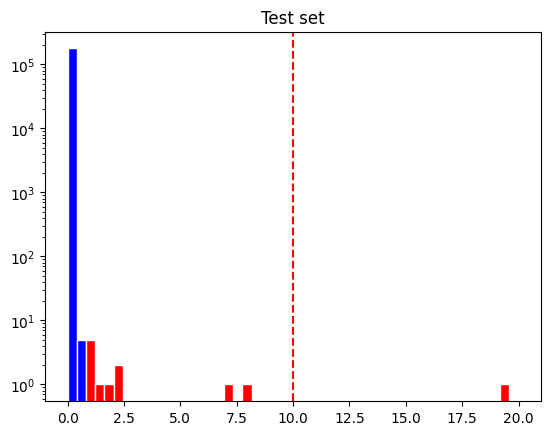

In [28]:
plot_res(dict_list, 0.99973, "treshold_099")

In [4]:
ID=300

onlyanomalies = False

open_file = open(f"test_{ID}/log.txt", "r")

lines = open_file.readlines()

list_param = []

list_param.append([])
list_param[-1].append("\"test_name\" : \""+str(f"test_{ID}")+"\"")


for i in range(39,60):
    
    lines_txt = lines[i][:-1]
    
    index = lines_txt.find(':')-1
    
    output_line = lines_txt[:index] + '"' + lines_txt[index:]

    index = output_line.find(':')

    if "dataset" in output_line or "mode" in output_line or "data_path" in output_line or "model_save_path" in output_line:
        
        output_line = output_line[:index+2] + '"' + output_line[index+2:] + '"'

    list_param[-1].append(str("\"")+str(output_line))

dict_list = []

for i in list_param:
    dict_list.append(eval("{" + ", ".join(i) + "}"))

dict_list = dict_list[0]

dict_list["dataset_name"] = eval(dict_list["dataset_name"])

In [4]:
whole_ds = pd.concat([pd.read_csv(os.path.join(dict_list['data_path'], dict_list['dataset_name'][0])), pd.read_csv(os.path.join(dict_list['data_path'], dict_list['dataset_name'][1]))])

In [5]:
if onlyanomalies:
        
    keyyy = []

    for i in whole_ds.keys():
        keyyy.append(i)

    keyyy = keyyy[1:]

    whole_ds.drop(columns=keyyy, inplace=True)
    whole_ds

In [6]:
training_df = pd.read_csv(f'test_{dict_list["ID"]}/train_energy.csv', names=["score"])
training_df.head()

,score
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,7.286752e-44


In [7]:
tests_df = pd.read_csv(f'test_{dict_list["ID"]}/train_energy_test.csv', names=["score"])
tests_df.head()

,score
0,0.000000e+00
1,0.000000e+00
2,1.101789e-36
3,3.728631e-29
4,1.042405e-24


In [8]:
whole_results = pd.concat([tests_df,training_df ], axis=0, ignore_index=True, )
whole_results

,score
0,0.000000e+00
1,0.000000e+00
2,1.101789e-36
3,3.728631e-29
4,1.042405e-24
...,...
293935,2.374222e-12
293936,3.253735e-17
293937,2.334739e-25
293938,2.391662e-36


In [9]:
whole_results.sort_values(by='score')

,score
0,0.000000
101839,0.000000
101840,0.000000
101841,0.000000
101842,0.000000
...,...
131363,2.121434
12417,2.197437
14995,6.942733
74361,8.004483


In [10]:
merged = pd.merge(whole_ds, whole_results, left_index=True, right_index=True)
merged

,time,"counts_['Count_Proton_0', 'Count_Proton_1', 'Count_Proton_2', 'Count_Proton_3', 'Count_Proton_4', 'Count_Proton_5', 'Count_Proton_6', 'Count_Proton_7']","counts_['Count_Electron_0', 'Count_Electron_1', 'Count_Electron_2', 'Count_Electron_3', 'Count_Electron_4', 'Count_Electron_5', 'Count_Electron_6', 'Count_Electron_7']","counts_['A412_2_0', 'A412_2_1', 'A412_2_2', 'A412_2_3', 'A412_2_4', 'A412_2_5', 'A412_2_6', 'A412_2_7']","counts_['A412_1_0', 'A412_1_1', 'A412_1_2', 'A412_1_3', 'A412_1_4', 'A412_1_5', 'A412_1_6', 'A412_1_7']","counts_['A412_0_0', 'A412_0_1', 'A412_0_2', 'A412_0_3', 'A412_0_4', 'A412_0_5', 'A412_0_6', 'A412_0_7']","counts_['A411_2_0', 'A411_2_1', 'A411_2_2', 'A411_2_3', 'A411_2_4', 'A411_2_5', 'A411_2_6', 'A411_2_7']","counts_['A411_1_0', 'A411_1_1', 'A411_1_2', 'A411_1_3', 'A411_1_4', 'A411_1_5', 'A411_1_6', 'A411_1_7']","counts_['A411_0_0', 'A411_0_1', 'A411_0_2', 'A411_0_3', 'A411_0_4', 'A411_0_5', 'A411_0_6', 'A411_0_7']",score
0,2021-10-01 00:30:00,-7.820471,-58641.187760,-0.007619,-0.000076,-0.081494,-1.089283,-20.842309,-667.965389,0.000000e+00
1,2021-10-01 00:42:00,1.025064,211.379734,0.005626,0.001938,0.003511,0.018109,0.036492,2.425667,0.000000e+00
2,2021-10-01 00:43:00,0.408397,-31.336933,-0.000104,0.001167,0.003075,-0.018693,0.007563,-0.363010,1.101789e-36
3,2021-10-01 00:44:00,-1.158270,-139.036933,-0.001870,-0.002805,-0.008175,0.014105,0.055216,-1.703533,3.728631e-29
4,2021-10-01 00:45:00,0.041730,-161.836933,-0.000095,0.000531,0.000023,-0.000313,-0.027740,-1.869879,1.042405e-24
...,...,...,...,...,...,...,...,...,...,...
116870,2021-09-30 23:25:00,0.933584,-39.296868,0.003375,0.000042,0.006637,0.019576,0.112734,-0.603268,3.080962e-09
116871,2021-09-30 23:26:00,2.400251,37.453132,0.003682,-0.001940,0.024553,0.109622,0.360409,-0.040620,3.474850e-09
116872,2021-09-30 23:27:00,1.002739,-10511.245751,0.008451,-0.013439,0.017504,-0.007209,-0.535356,-123.121668,7.704885e-09
116873,2021-09-30 23:28:00,-2.063927,-10476.162417,-0.001940,-0.008547,-0.014448,0.015345,-0.104301,-123.160109,9.252378e-09


In [11]:
trsh = np.quantile(merged['score'].values, 0.998)
trsh 


0.000965831510256976

In [12]:
points = merged.where(merged['score'] > trsh).dropna()

for i in points.keys():
    if i != 'time':
        points.drop(columns=i, inplace=True)

points

,time
190,2021-10-01 12:07:00
517,2021-10-02 05:27:00
3607,2021-10-09 05:54:00
4065,2021-10-10 07:10:00
4532,2021-10-11 08:56:00
...,...
113329,2021-09-21 22:58:00
113649,2021-09-22 17:44:00
113832,2021-09-23 19:12:00
114567,2021-09-25 18:17:00


In [13]:
points

,time
190,2021-10-01 12:07:00
517,2021-10-02 05:27:00
3607,2021-10-09 05:54:00
4065,2021-10-10 07:10:00
4532,2021-10-11 08:56:00
...,...
113329,2021-09-21 22:58:00
113649,2021-09-22 17:44:00
113832,2021-09-23 19:12:00
114567,2021-09-25 18:17:00


In [14]:
if "time" not in points.keys():
    points.rename(columns={"TIME":"time"}, inplace=True)
if "time" not in merged.keys():
    merged.rename(columns={"TIME":"time"}, inplace=True)

points["time"] = pd.to_datetime(points["time"])
merged["time"] = pd.to_datetime(merged["time"])

In [15]:
merged.sort_values(by='time', inplace=True)

Index(['counts_['Count_Electron_0', 'Count_Electron_1', 'Count_Electron_2', 'Count_Electron_3', 'Count_Electron_4', 'Count_Electron_5', 'Count_Electron_6', 'Count_Electron_7']'], dtype='object')


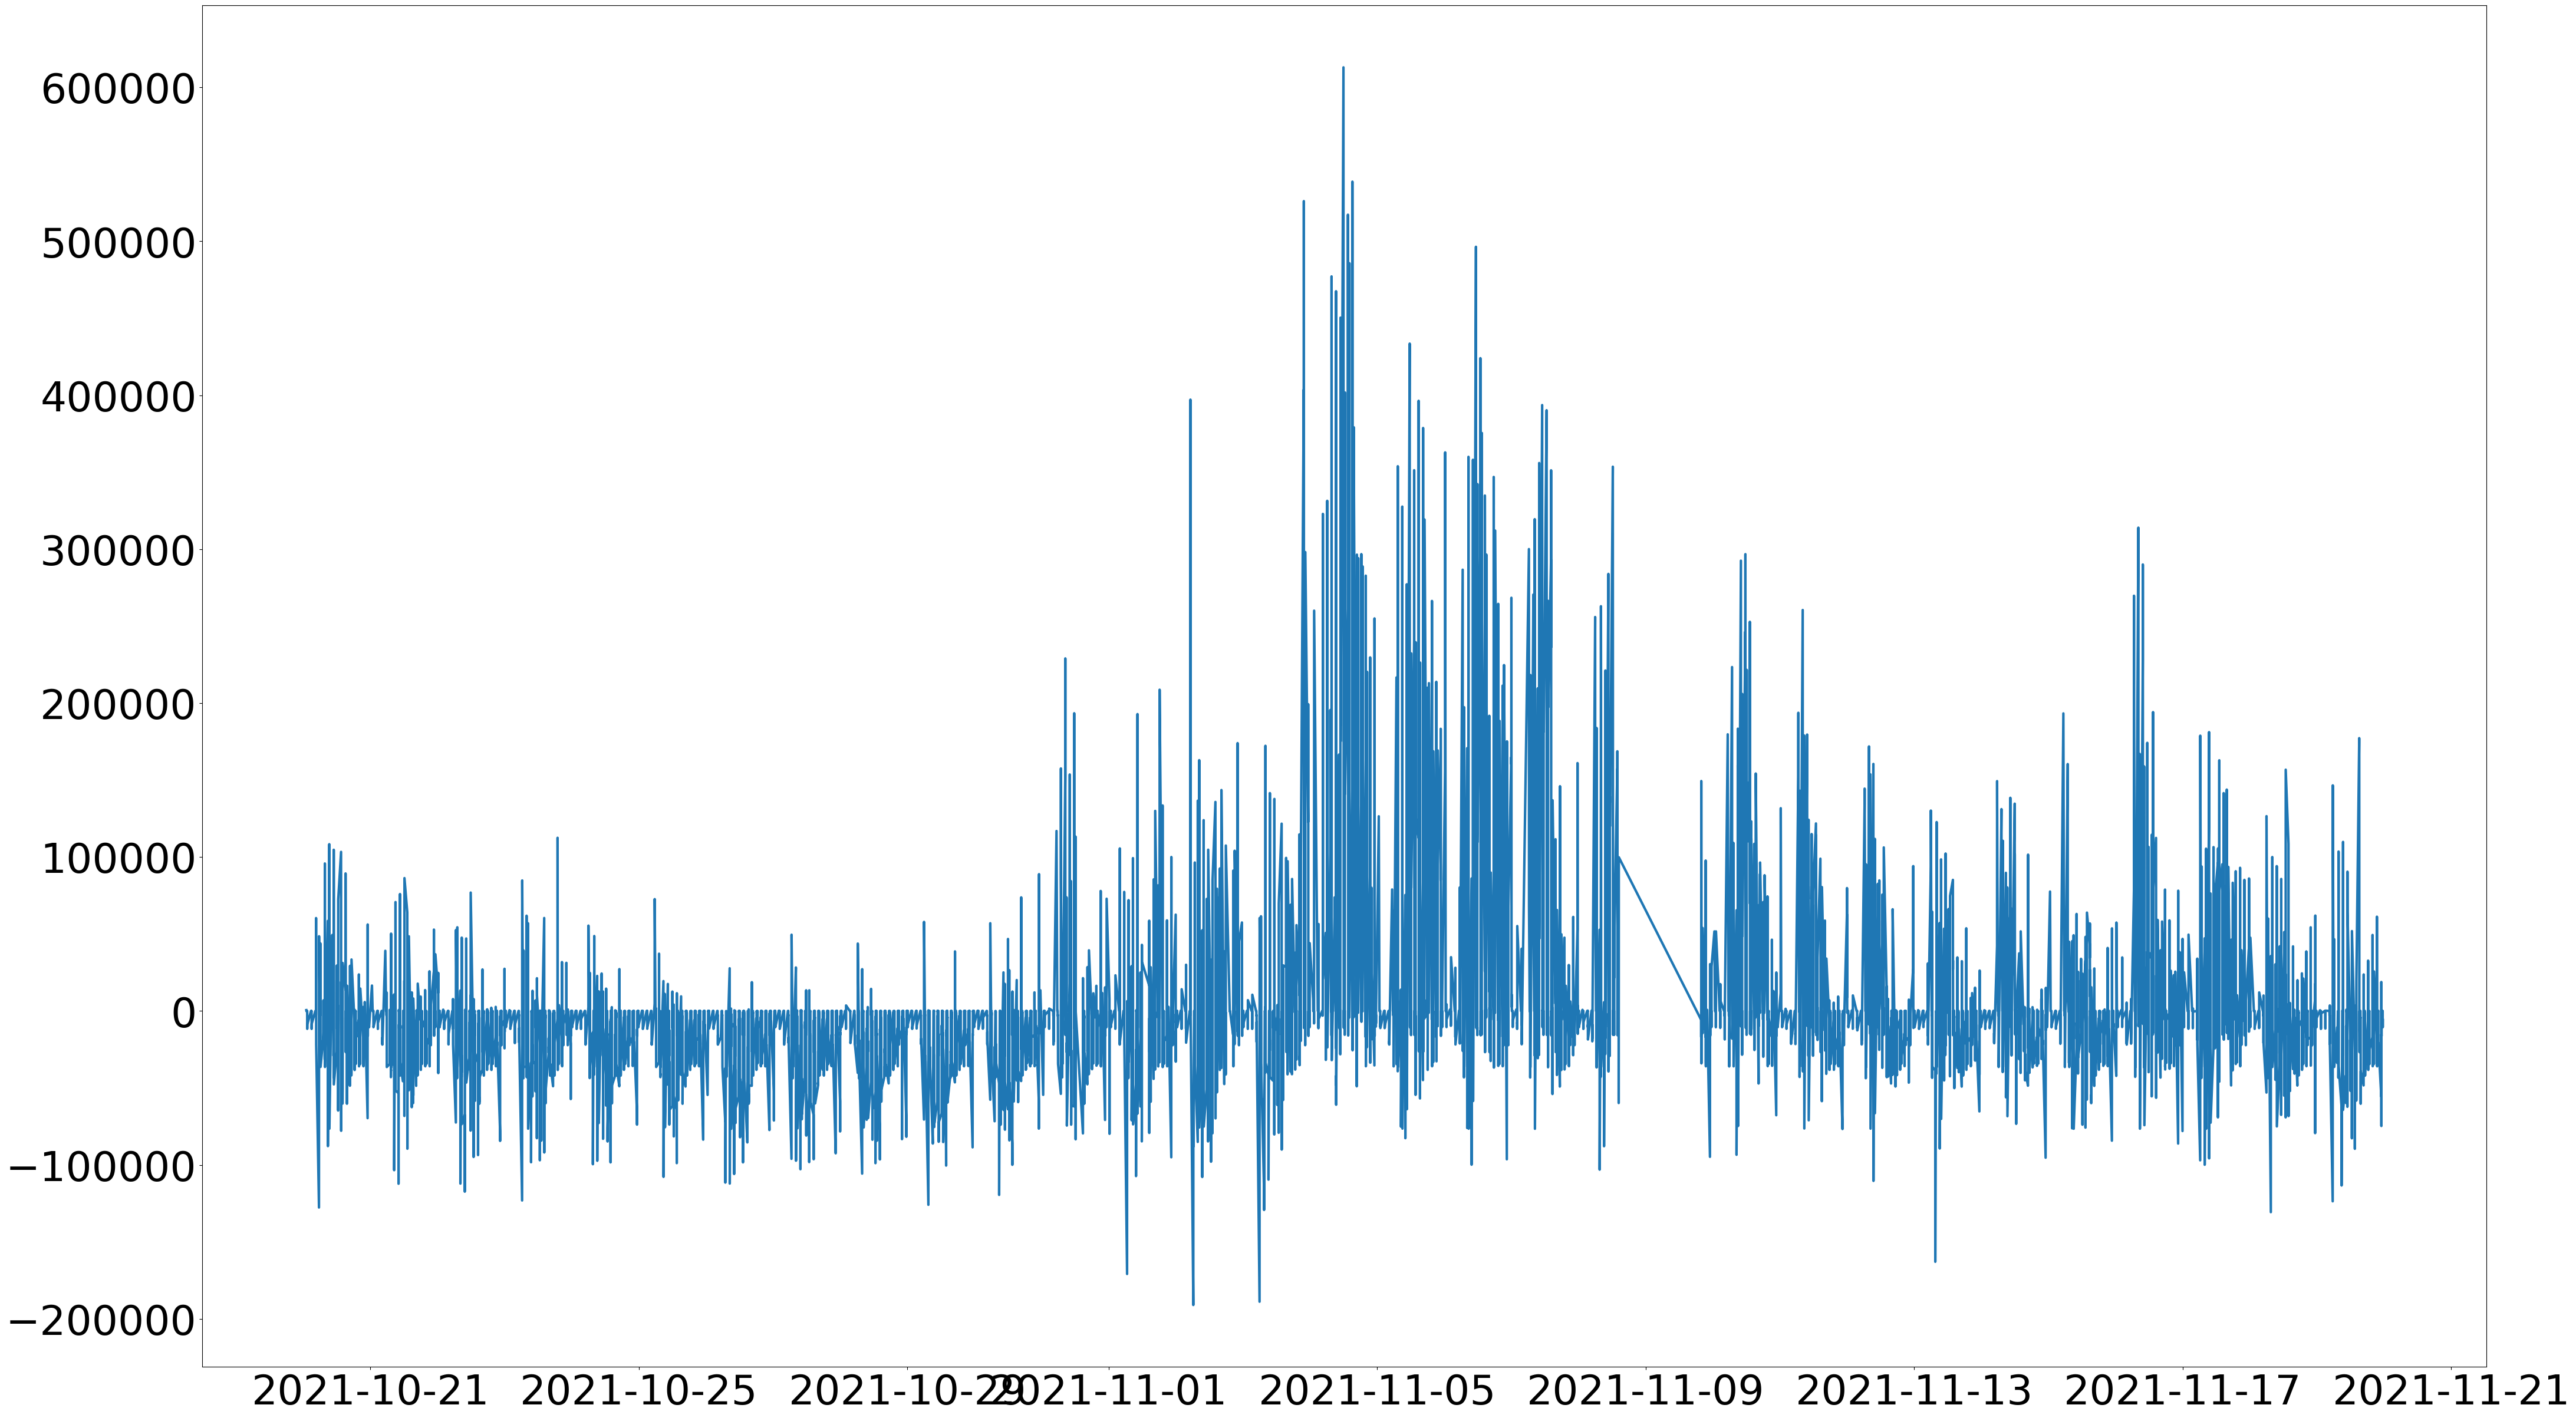

In [18]:
font = {'size'   : 50}

plt.rc('font', **font)

startdate = datetime.datetime(2021,10,20)
enddate = datetime.datetime(2021,11,20)


merged = merged.where(merged["time"] > startdate)
merged = merged.where(merged["time"] < enddate)
points = points.where(points["time"] > startdate)
points = points.where(points["time"] < enddate)

keys = merged.keys()[2:3]

titles = [ "Electron counts" , "Proton counts", "Electron counts", "Proton energy"]

fig , ax = plt.subplots(len(keys),figsize=(50,30))

print(keys)

for i in range(0,len(keys)):

    ax.plot(merged["time"],merged[keys[i]], label=keys[i], linewidth=3)
    #ax[i-1].set_title(titles[i])

for l in range(0, len(keys)-1):
    for x in points.values:
        ax[l].axvline(x=x, color='r',alpha=1, linewidth=3)


In [17]:

# fig, ax = plt.subplots(len(comp_set.columns)+1,1,figsize=(100, 50))

# points = np.where(train>trh)[0]

# points_test = np.where(test>trh)[0]
# points_test = points_test + len(train)

# for i in range(1, len(comp_set.columns)+1):
#     ax[i].plot(range(len(comp_set[comp_set.keys()[i-1]].values)),comp_set[comp_set.keys()[i-1]].values)
#     ax[i].set_title(comp_set.keys()[i-1])

# for l in range(0, len(comp_set.columns)+1):

#     for x in points:
#         ax[l].axvline(x=x, color='r',alpha=0.1)

#     for x in points_test:
#         ax[l].axvline(x=x, color='g',alpha=0.1)


# ax[0].plot(train)
# ax[0].set_title(f'Model output, {config_test["quantile_treshold"]} treshold, anomalies_found: {len(points)+len(points_test)}')
# ax[0].plot(range(len(train),len(train)+len(test)),test)


# fig.savefig(f'test_{config_test["ID"]}/{tresh_folder}/final_time_series.png')

# plt.close("all")